<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> II. Analyse exploratoire des fichiers</h2>
</div>

In [1]:
#Importer les librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

from matplotlib.collections import LineCollection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import confusion_matrix

In [2]:
# Importer le fichier final
df_final = pd.read_csv('df_final.csv')

df_final.head() #Afficher les 5 premières lignes de la table

,Zone,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique
0,Afghanistan,0.69,0.0,33.0,28.0,40099462.0,1516.3,-2.53
1,Afrique du Sud,20.02,47.0,372.0,1922.0,59392255.0,13311.9,-0.71
2,Albanie,10.06,0.0,48.0,14.0,2854710.0,14516.3,0.11
3,Algérie,2.64,0.0,0.0,258.0,44177969.0,11039.8,-0.88
4,Allemagne,8.22,586.0,768.0,1546.0,83408554.0,53179.7,0.76


In [3]:
#Vérifier les valeurs nulles
df_final.isnull().sum()

Zone                                                        0
Disponibilité de protéines en quantité (g/personne/jour)    0
Exportations                                                0
Importations                                                0
Production                                                  0
Population                                                  0
PIB par habitant                                            0
Stabilité politique                                         0
dtype: int64

Aucune valeur manquante.

In [4]:
#Indexation
df_final.set_index('Zone', inplace=True)
df_final.head() #Afficher les 5 premières lignes de la table

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique
Zone,,,,,,,
Afghanistan,0.69,0.0,33.0,28.0,40099462.0,1516.3,-2.53
Afrique du Sud,20.02,47.0,372.0,1922.0,59392255.0,13311.9,-0.71
Albanie,10.06,0.0,48.0,14.0,2854710.0,14516.3,0.11
Algérie,2.64,0.0,0.0,258.0,44177969.0,11039.8,-0.88
Allemagne,8.22,586.0,768.0,1546.0,83408554.0,53179.7,0.76


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1. Analyse en composantes principales (ACP)</h3>
</div>

In [5]:
#Mettre la table sous forme matrice
X = df_final.values
Pays = df_final.index
Variables = df_final.columns
X[:5] # Afficher les 5 premières lignes

array([[ 6.9000000e-01,  0.0000000e+00,  3.3000000e+01,  2.8000000e+01,
         4.0099462e+07,  1.5163000e+03, -2.5300000e+00],
       [ 2.0020000e+01,  4.7000000e+01,  3.7200000e+02,  1.9220000e+03,
         5.9392255e+07,  1.3311900e+04, -7.1000000e-01],
       [ 1.0060000e+01,  0.0000000e+00,  4.8000000e+01,  1.4000000e+01,
         2.8547100e+06,  1.4516300e+04,  1.1000000e-01],
       [ 2.6400000e+00,  0.0000000e+00,  0.0000000e+00,  2.5800000e+02,
         4.4177969e+07,  1.1039800e+04, -8.8000000e-01],
       [ 8.2200000e+00,  5.8600000e+02,  7.6800000e+02,  1.5460000e+03,
         8.3408554e+07,  5.3179700e+04,  7.6000000e-01]])

In [6]:
#Vérifier les dimensions de notre data
X.shape

(165, 7)

Nous avons 165 individus (Pays) et 7 variables.

In [7]:
#Standardiser nos données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#Mettre la moyenne à 0 et l'écart_type à 1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
#Calculer les composantes principales
n_components = 7

# On instancie notre ACP
pca = PCA(n_components = n_components)

# On l'entraine sur nos données actuelles
pca_result= pca.fit(X_scaled)

In [10]:
#Calcul de la variance expliquée
pca.explained_variance_ratio_

array([0.3223963 , 0.29815994, 0.12422411, 0.09206084, 0.0799442 ,
       0.05690492, 0.02630969])

In [11]:
# Arrondir la variannce expliquée et enregistrer dans une variable 
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([32.24, 29.82, 12.42,  9.21,  7.99,  5.69,  2.63])

La première composante explique 32,24% de la variance observée dans les données, et la deuxième 29,82 %. Au total, ces deux composantes expliquent 62,06 % de la variance totale.

In [12]:
#Calculer la variance cumulée, arrondir  et enregistrer dans une variable
scree_cum = scree.cumsum().round()
scree_cum

array([ 32.,  62.,  74.,  84.,  92.,  97., 100.])

In [13]:
#Définir une variable avec la liste de nos composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

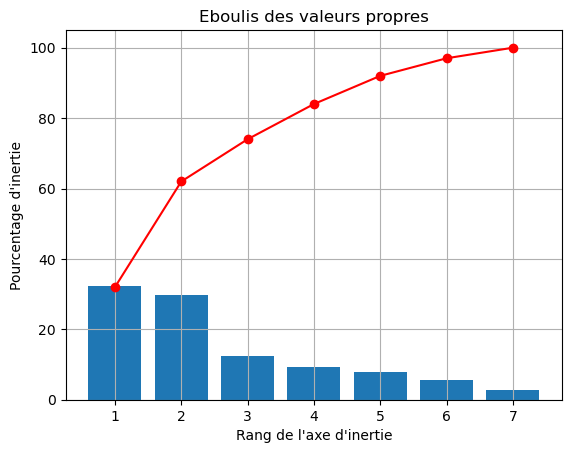

In [14]:
#Afficher l'éboulis des valeurs propres
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.grid(True)
plt.show(block=False)


- On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.
- On voit ici que près de 75% de la variance est comprise dans les 3 premières composantes, et près de 85% dans les 4 premières. 

In [15]:
#Components
pcs = pca.components_
pcs

array([[ 0.0713501 ,  0.39997519,  0.48412782,  0.58926455,  0.44613184,
         0.23250319, -0.01500667],
       [-0.46620976, -0.12545027, -0.08406929,  0.10307361,  0.38296984,
        -0.50044895, -0.59338337],
       [-0.62532393,  0.67459346,  0.01253849, -0.24568378, -0.26900991,
         0.14469251,  0.00858244],
       [ 0.39573519,  0.52849746, -0.64654877,  0.24203053, -0.00440515,
        -0.29223359, -0.04538877],
       [-0.31389939, -0.19056892, -0.57359389,  0.10165927,  0.43198437,
         0.54519685,  0.20483165],
       [ 0.2609744 ,  0.03124825, -0.05179641, -0.13189366, -0.14568508,
         0.53781784, -0.7748322 ],
       [ 0.25155676,  0.2293539 ,  0.09315187, -0.70389863,  0.61162089,
        -0.05166324,  0.05671184]])

In [16]:
#Afficher en version Pandas
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.071350,0.399975,0.484128,0.589265,0.446132,0.232503,-0.015007
1,-0.466210,-0.125450,-0.084069,0.103074,0.382970,-0.500449,-0.593383
2,-0.625324,0.674593,0.012538,-0.245684,-0.269010,0.144693,0.008582
3,0.395735,0.528497,-0.646549,0.242031,-0.004405,-0.292234,-0.045389
4,-0.313899,-0.190569,-0.573594,0.101659,0.431984,0.545197,0.204832
5,0.260974,0.031248,-0.051796,-0.131894,-0.145685,0.537818,-0.774832
6,0.251557,0.229354,0.093152,-0.703899,0.611621,-0.051663,0.056712


In [17]:
pcs.columns = Variables
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique
F1,0.07,0.40,0.48,0.59,0.45,0.23,-0.02
F2,-0.47,-0.13,-0.08,0.10,0.38,-0.50,-0.59
F3,-0.63,0.67,0.01,-0.25,-0.27,0.14,0.01
F4,0.40,0.53,-0.65,0.24,-0.00,-0.29,-0.05
F5,-0.31,-0.19,-0.57,0.10,0.43,0.55,0.20
F6,0.26,0.03,-0.05,-0.13,-0.15,0.54,-0.77
F7,0.25,0.23,0.09,-0.70,0.61,-0.05,0.06


In [18]:
#Transposer notre table
pcs.T

,F1,F2,F3,F4,F5,F6,F7
Disponibilité de protéines en quantité (g/personne/jour),0.071350,-0.466210,-0.625324,0.395735,-0.313899,0.260974,0.251557
Exportations,0.399975,-0.125450,0.674593,0.528497,-0.190569,0.031248,0.229354
Importations,0.484128,-0.084069,0.012538,-0.646549,-0.573594,-0.051796,0.093152
Production,0.589265,0.103074,-0.245684,0.242031,0.101659,-0.131894,-0.703899
Population,0.446132,0.382970,-0.269010,-0.004405,0.431984,-0.145685,0.611621
PIB par habitant,0.232503,-0.500449,0.144693,-0.292234,0.545197,0.537818,-0.051663
Stabilité politique,-0.015007,-0.593383,0.008582,-0.045389,0.204832,-0.774832,0.056712


<Axes: >

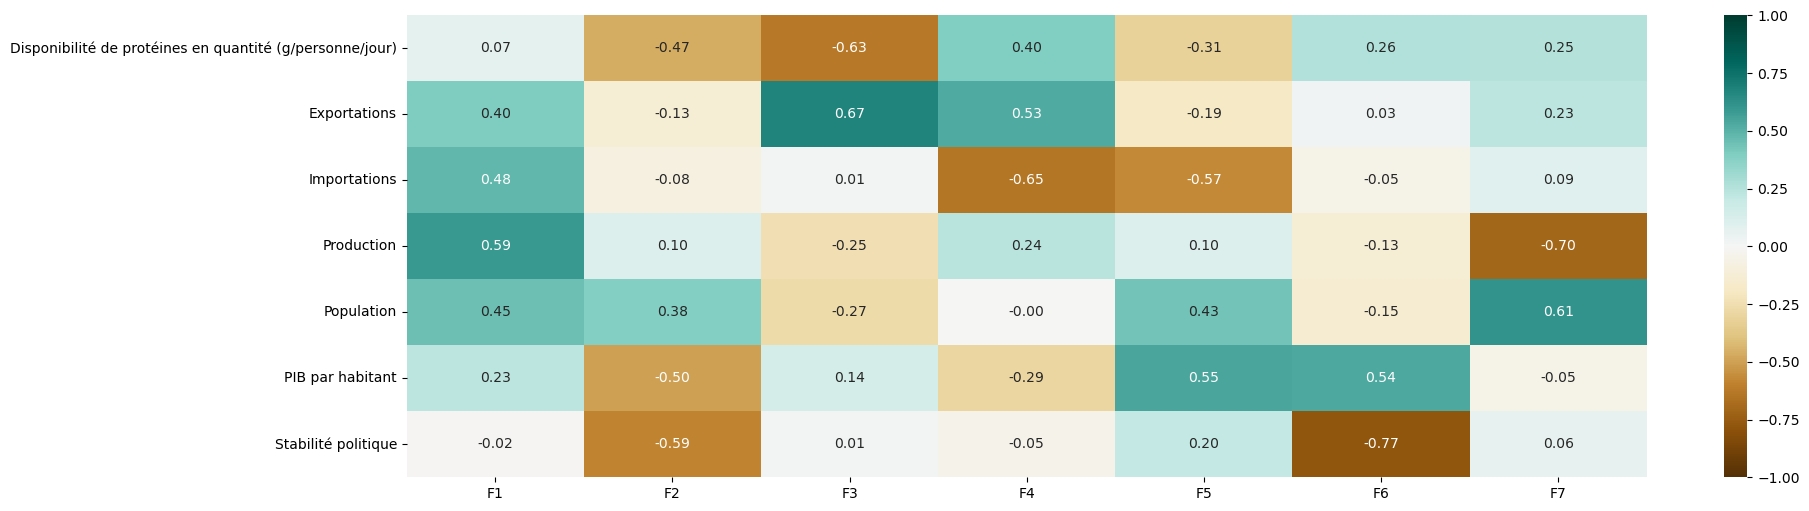

In [19]:
#Corrélation entre les variables et les composantes
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="BrBG", fmt="0.2f")

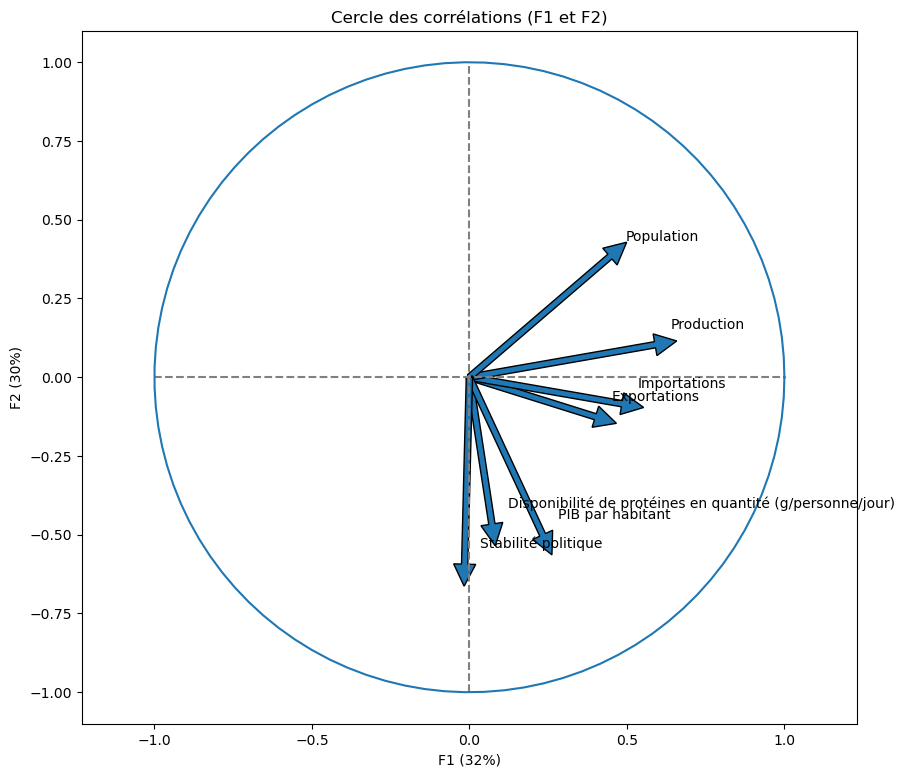

In [20]:
#Cercle de corrélation
x, y = 0,1

 # Taille de l'image (en inches)
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             Variables[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x])))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y])))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)


##### Observation 

- Sur F1 : toutes les variables sont correlées positivement à F1.
- F1 peut être interprété comme une mesure de l'activité économique globale d'un pays. 

- Sur F2 : variables fortement corrélées (négativement) :Stabilité politique, PIB et Disponibilité de protèines
- F2 peut être interprété comme une mesure de la prospérité économique, de la stabilité politique des pays et de la sécurité alimentaire.


Nous allons projeter le nuage des indidividus sur le premier plan factoriel, c’est-à-dire sur un plan composé des 2 premières composantes principales F1 et F2.

In [21]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

#Nuage des points des individus
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels=None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8],
                                colors=None,
                                marker="." ):

# Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
        
    # Les points    
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, s=100, palette="deep")

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}', fontsize=18)
    ax.set_ylabel(f'F{y+1} {v2}', fontsize=18)

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='16', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})", fontsize=20)
    plt.legend(fontsize='18', title_fontsize='14')
    plt.show()


C:\Users\aimee\AppData\Local\Temp\ipykernel_4440\3862401567.py:46: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, s=100, palette="deep")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


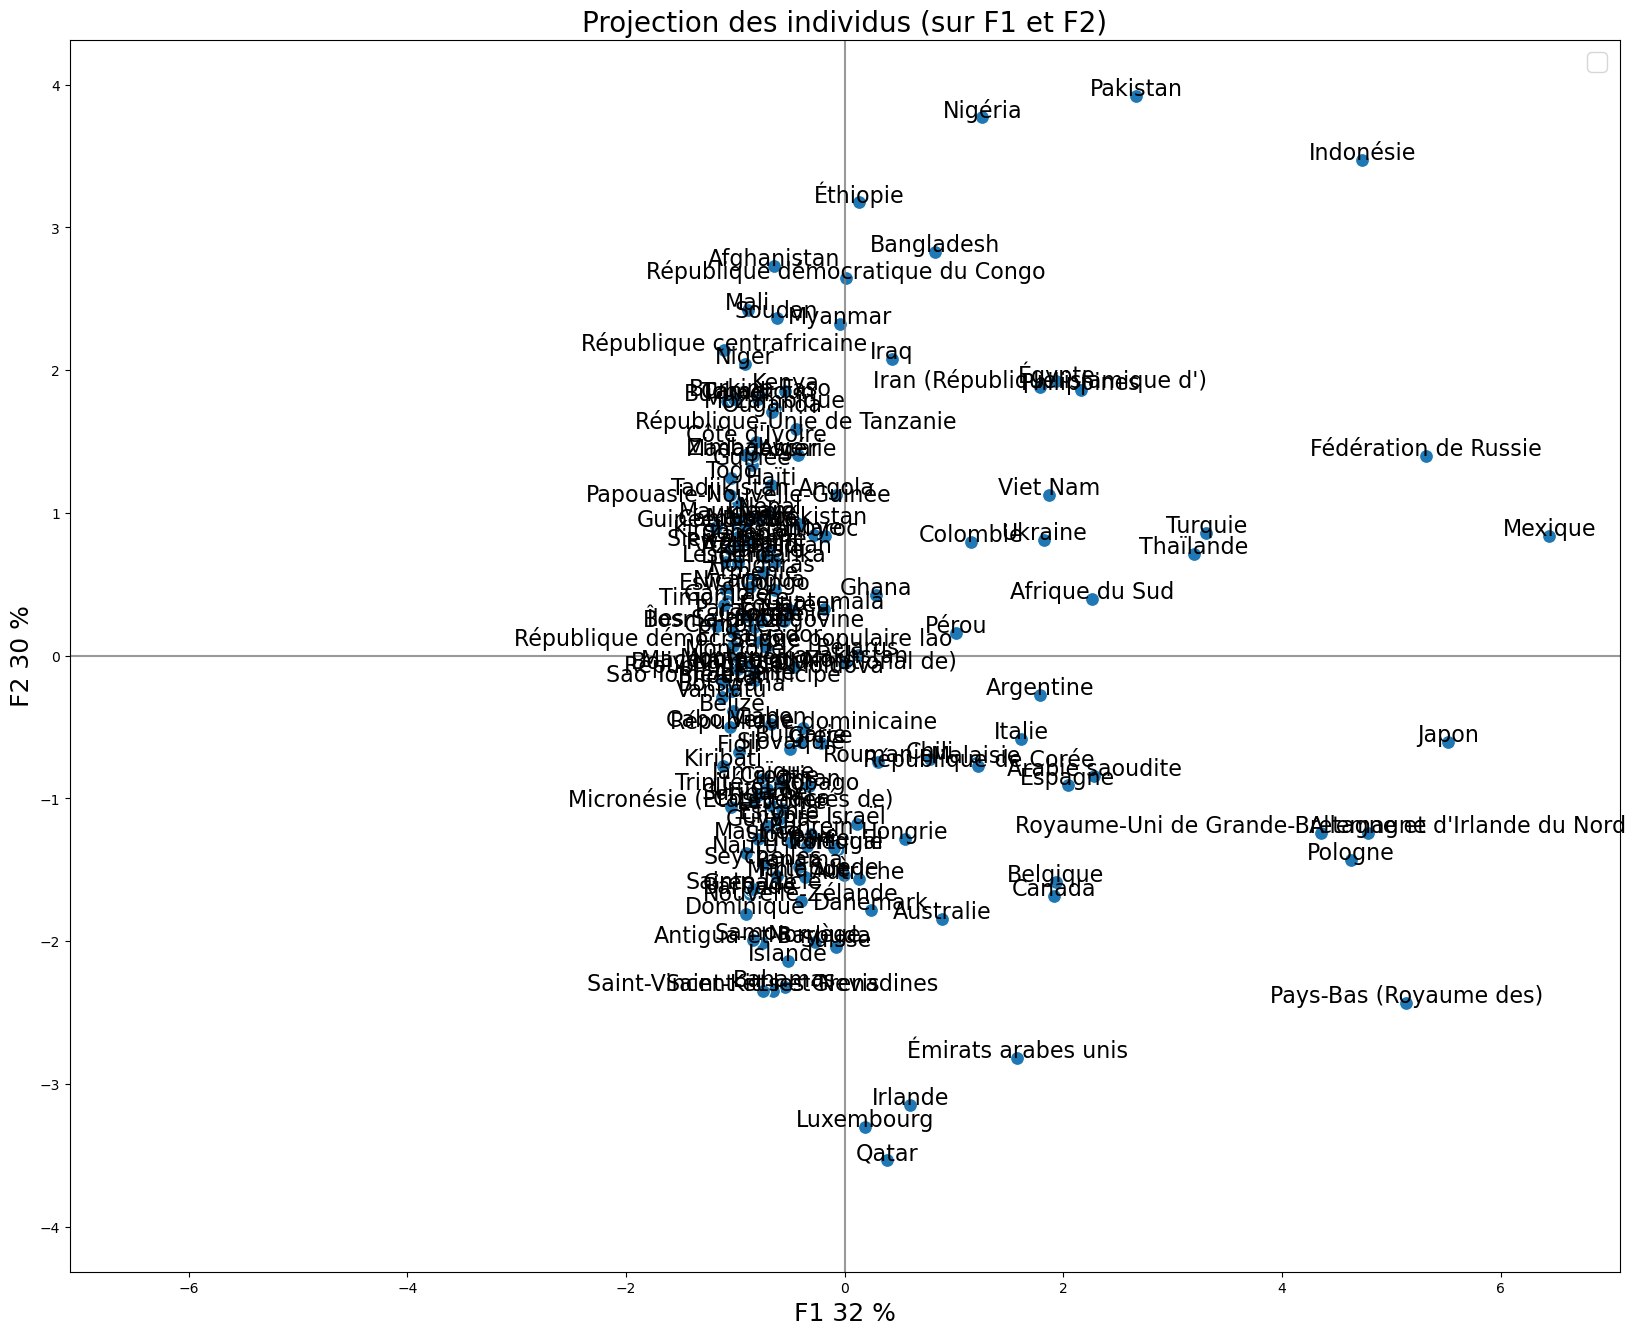

In [22]:
 x_y= 0, 1  # Indices des axes F1 et F2

# Affichage de la projection
display_factorial_planes(X_proj, (0,1), pca, labels=Pays, figsize=(20,16), marker="o")

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2. Clustering</h3>
</div>

<div style="background-color: RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color:#fff; text-align: center"> Classification ascendante hiérarchique(CAH) par un dendrogramme </h4>
</div>

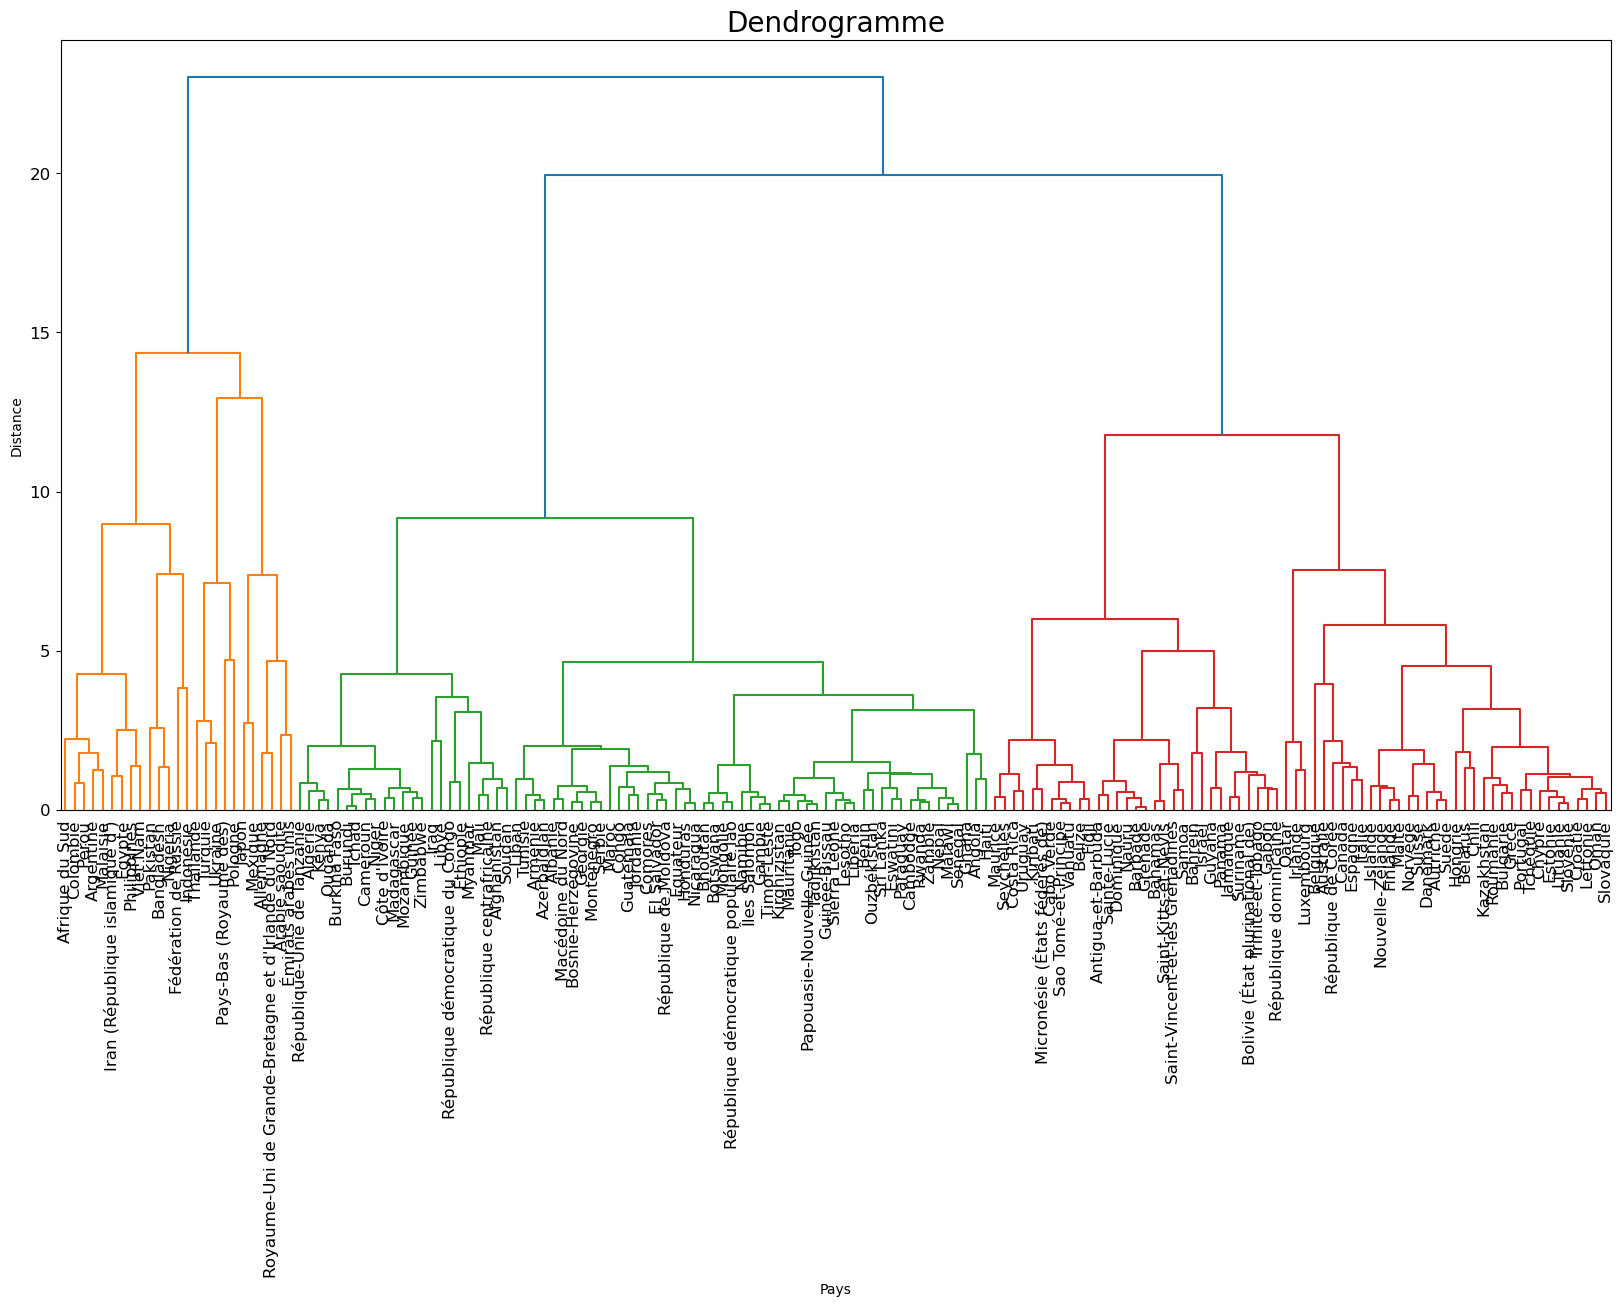

In [23]:
#Création du dendrogramme
Z = linkage(X_scaled, method="ward")
def plot_dendogram(Z, Pays):
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))

    _ = dendrogram(Z, ax=ax, labels=Pays, orientation = "top")

    plt.title("Dendrogramme", fontsize=20)
    ax.set_xlabel("Pays")
    ax.set_ylabel("Distance")
    ax.tick_params(axis='x', which='major', labelsize=12)
    ax.tick_params(axis='y', which='major', labelsize=12)
    plt.grid(False)
    plt.show()
    
plot_dendogram(Z, Pays)


Nous allons découper le dendrogramme en 4 clusters.

In [24]:
# Découpe du dendrogramme en 4 clusters
clusters = fcluster(Z, 4, criterion='maxclust')

# Création d'un df avec une colonne cluster et une colonne zone
groupes = pd.DataFrame({"cluster": clusters, "Zone": Pays})
print(groupes)

     cluster                 Zone
0          3          Afghanistan
1          1       Afrique du Sud
2          3              Albanie
3          3              Algérie
4          2            Allemagne
..       ...                  ...
160        1               Égypte
161        2  Émirats arabes unis
162        3             Équateur
163        3             Éthiopie
164        3         Îles Salomon

[165 rows x 2 columns]


In [25]:
# Je tri les pays par cluster
groupes.sort_values(by=['cluster']).head()

,cluster,Zone
114,1,Philippines
15,1,Bangladesh
34,1,Colombie
109,1,Pakistan
157,1,Viet Nam


In [26]:
# Affichage du nombre de pays par cluster
groupes['cluster'].value_counts()

cluster
3    74
4    66
1    14
2    11
Name: count, dtype: int64

Le découpage du dendogramme en 4 clusters nous donne les groupes suivants:
   - Cluster 1 : 14 pays
   - Cluster 2 : 11 pays
   - Cluster 3 : 74 pays  
   - Cluster 3 : 66 pays 

In [27]:
# Jointure de la colonne cluster dans df_final
df_final_clusters = pd.merge(df_final, groupes, on='Zone')

In [28]:
#Indexation
df_final_clusters.set_index('Zone', inplace=True)
df_final_clusters.head() #Afficher les 5 premières lignes de la table

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique,cluster
Zone,,,,,,,,
Afghanistan,0.69,0.0,33.0,28.0,40099462.0,1516.3,-2.53,3
Afrique du Sud,20.02,47.0,372.0,1922.0,59392255.0,13311.9,-0.71,1
Albanie,10.06,0.0,48.0,14.0,2854710.0,14516.3,0.11,3
Algérie,2.64,0.0,0.0,258.0,44177969.0,11039.8,-0.88,3
Allemagne,8.22,586.0,768.0,1546.0,83408554.0,53179.7,0.76,2


In [29]:
# Calcul de la moyenne des variables pour chaque cluster 
df_final_clusters_moy = df_final_clusters.groupby('cluster').mean()
print(df_final_clusters_moy)

         Disponibilité de protéines en quantité (g/personne/jour)  \
cluster                                                             
1                                                11.447857          
2                                                12.617273          
3                                                 4.847703          
4                                                16.381667          

         Exportations  Importations   Production    Population  \
cluster                                                          
1           36.000000    119.285714  1967.428571  1.189303e+08   
2          529.727273    545.000000  1778.818182  6.391274e+07   
3            1.256757     38.013514    90.770270  1.865636e+07   
4           42.818182     50.378788   222.166667  7.462540e+06   

         PIB par habitant  Stabilité politique  
cluster                                         
1            13536.650000            -0.804286  
2            38647.463636             0.0

Nous allons utiliser par la suite d'autres méthodes afin de vérifier la pertinence du partitionnement.

<div style="background-color: RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color:#fff; text-align: center"> Méthode K_Means </h4>
</div>

Pour déterminer le nombre de clusters à étudier cela revient à réaliser le graphique dit méthode du coude qui trace l'inertie intraclasse en fonction du nombre de clusters. On cherche plus particulièrement une "cassure" dans la courbe. Cette "cassure" nous indique à partir de quel nombre de clusters est optimum. 

C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

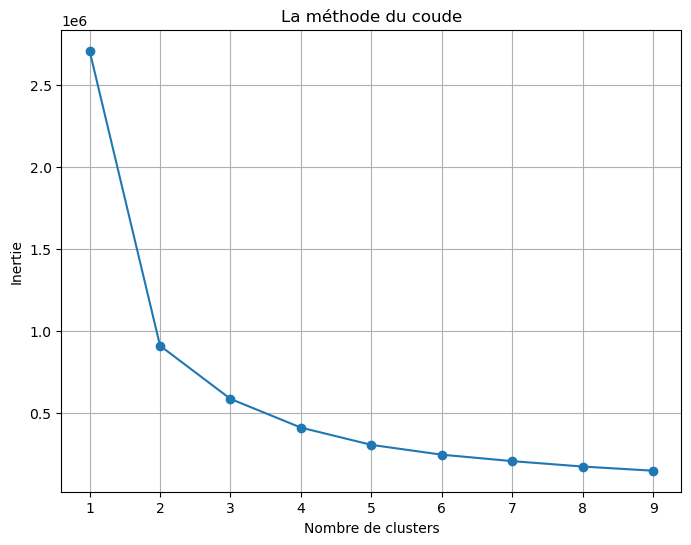

In [30]:
# Liste pour stocker les valeurs d'inertie
inertia = []
k_range = range(1, 10)

# Calcul de l'inertie pour chaque valeur de k
for k in k_range:
    model = KMeans(n_clusters=k).fit(Z)
    inertia.append(model.inertia_)

# Tracer le graphe du coude (elbow plot)
fig = plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("La méthode du coude")
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()


- Nous pouvons choisir entre 3 et 4 clusters selon le graphe du coude.
- Pour juger un bon clustering nous allons plusieurs 'scores'

- l'indice de Davies Bouldin qui prend en compte la variance intraclasse et interclasse ;

- le Silhouette Score qui prend en compte l'appartenance de chaque individu au plus proche cluster.

C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

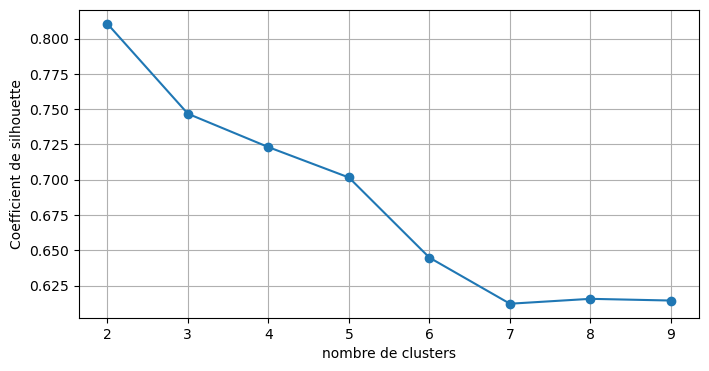

[0.810505318897282,
 0.7467356653440372,
 0.7230830398956096,
 0.7015509420073445,
 0.644771603367333,
 0.6121126909802539,
 0.6155802703212252,
 0.6143649363914095]

In [31]:
#Silhouette Score
from sklearn.metrics import silhouette_score
silhouette =[]
k_range=range(2,10)
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(X)
    silhouette.append(silhouette_score(X,cluster_labels))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range,silhouette, marker = 'o')
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid(True)
plt.show()
silhouette


Selon le graphique, il faut privilégier 2 clusters. La valeur pour laquelle le coefficient de silhouette est plus élevé. Vérifions ce nombre de clusters par une autre méthode.

C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

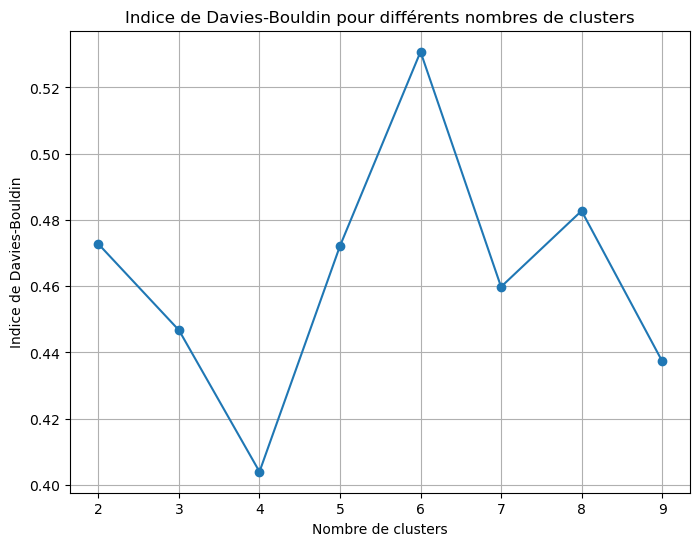

In [32]:
# Indice de Davies Bouldin
from sklearn.metrics import davies_bouldin_score
# Stocker les scores de Davies-Bouldin pour chaque nombre de clusters
dbi_scores = []
range_n_clusters = list(range(2, 10))
for n_clusters in range_n_clusters:
    # Initialiser le cluster KMeans avec n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculer l'indice de Davies-Bouldin pour ces étiquettes
    dbi = davies_bouldin_score(X, cluster_labels)
    dbi_scores.append(dbi)
# Tracer les scores de Davies-Bouldin
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, dbi_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Indice de Davies-Bouldin')
plt.title('Indice de Davies-Bouldin pour différents nombres de clusters')
plt.grid(True)
plt.show()


Un indice de Davies-Bouldin plus faible indique une meilleure séparation des clusters et une compacité des clusters plus élevée.
Selon ce graphique le nombre optimal de cluster est de 4. Nous allons donc former 4 clusters pour la méthode k_means et les analyser.

In [33]:
# Former 4 les clusters 
clusters = fcluster(Z, 4, criterion="maxclust")

# Ajouter les étiquettes de clusters à notre DataFrame
df_final['Cluster'] = clusters

# Afficher les premières lignes pour vérifier les clusters
df_final.head()

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique,Cluster
Zone,,,,,,,,
Afghanistan,0.69,0.0,33.0,28.0,40099462.0,1516.3,-2.53,3
Afrique du Sud,20.02,47.0,372.0,1922.0,59392255.0,13311.9,-0.71,1
Albanie,10.06,0.0,48.0,14.0,2854710.0,14516.3,0.11,3
Algérie,2.64,0.0,0.0,258.0,44177969.0,11039.8,-0.88,3
Allemagne,8.22,586.0,768.0,1546.0,83408554.0,53179.7,0.76,2


C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


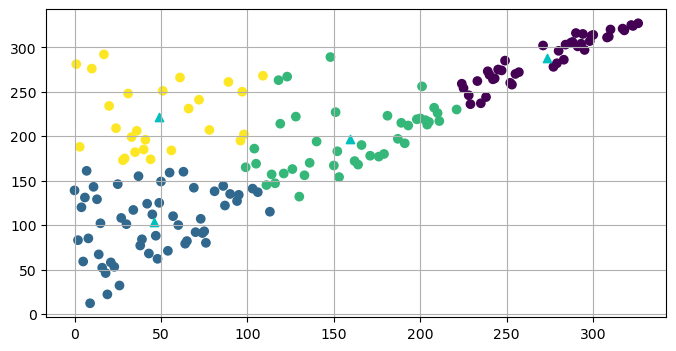

Inertie totale : 408530.04868058


In [34]:
# Affichage du nuage de points (individus) en cluster avec les centoîdes
fig = plt.figure(figsize=(8,4))
model = KMeans(n_clusters=4)
model.fit(Z)
model.predict(Z)
plt.scatter(Z[:,0], Z[:,1],c=model.predict(Z))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='^',c='c')
plt.grid()
plt.show()
print('Inertie totale :',model.inertia_)


Le centroïde, c’est le centre de gravité du cluster. C’est en fait l’individu théorique moyen du cluster. Nos centroîdes sont bien espacés.

<div style="background-color: RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color:#fff; text-align: center"> Etude des clusters </h3>
</div>

In [35]:
# Cluster 1
cluster_1=df_final.loc[df_final['Cluster']==1]
cluster_1.head()

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique,Cluster
Zone,,,,,,,,
Afrique du Sud,20.02,47.0,372.0,1922.0,59392255.0,13311.9,-0.71,1
Argentine,21.88,157.0,10.0,2339.0,45276780.0,21527.2,-0.11,1
Bangladesh,0.72,0.0,0.0,277.0,169356251.0,5911.0,-0.97,1
Colombie,15.73,0.0,101.0,1694.0,51516562.0,14648.6,-0.91,1
Fédération de Russie,14.17,217.0,246.0,4617.0,145102755.0,27960.1,-0.65,1


In [36]:
# Cluster 2
cluster_2=df_final.loc[df_final['Cluster']==2]
cluster_2.head()

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique,Cluster
Zone,,,,,,,,
Allemagne,8.22,586.0,768.0,1546.0,83408554.0,53179.7,0.76,2
Arabie saoudite,18.74,45.0,626.0,910.0,35950396.0,44339.3,-0.58,2
Japon,11.73,6.0,1136.0,2436.0,124612530.0,40784.4,1.03,2
Mexique,17.43,2.0,1189.0,3687.0,126705138.0,19086.1,-0.64,2
Pays-Bas (Royaume des),5.51,1306.0,763.0,887.0,17501696.0,56617.4,0.92,2


In [37]:
# Cluster 3
cluster_3 = df_final.loc[df_final['Cluster']==3]
cluster_3.head()

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique,Cluster
Zone,,,,,,,,
Afghanistan,0.69,0.0,33.0,28.0,40099462.0,1516.3,-2.53,3
Albanie,10.06,0.0,48.0,14.0,2854710.0,14516.3,0.11,3
Algérie,2.64,0.0,0.0,258.0,44177969.0,11039.8,-0.88,3
Angola,3.74,0.0,246.0,40.0,34503774.0,5908.6,-0.71,3
Arménie,8.65,0.0,39.0,15.0,2790974.0,14193.1,-0.84,3


In [38]:
# Cluster 4
cluster_4 = df_final.loc[df_final['Cluster']==4]
cluster_4.head()

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique,Cluster
Zone,,,,,,,,
Antigua-et-Barbuda,30.72,0.0,7.0,0.0,93219.0,19124.4,0.96,4
Australie,22.30,50.0,3.0,1327.0,25921089.0,49774.3,0.85,4
Autriche,8.06,92.0,109.0,151.0,8922082.0,54121.1,0.91,4
Bahamas,32.17,2.0,26.0,6.0,407906.0,30210.2,0.88,4
Bahreïn,20.58,0.0,61.0,8.0,1463265.0,49387.4,-0.51,4


In [39]:
# Nombre de pays par cluster
df_final['Cluster'].value_counts()

Cluster
3    74
4    66
1    14
2    11
Name: count, dtype: int64

- Cluster 1 : 14 pays
- Cluster 2 : 11 pays
- Cluster 3 : 74 pays
- Cluster 4 : 66 pays

In [40]:
# Séparer les données et la colonne 'Cluster'
data_to_normalize = df_final.drop(columns=['Cluster'])
clusters = df_final['Cluster']

In [41]:
# Normaliser les données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_to_normalize)
df_norm = pd.DataFrame(data_normalized, columns=data_to_normalize.columns, index=df_final.index)

In [42]:
# Ajouter les clusters
df_norm['Cluster'] = clusters

# Affichage des résultats normalisés avec les clusters
print(df_norm)

                     Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                            
Afghanistan                                                  -1.202244          
Afrique du Sud                                                1.157258          
Albanie                                                      -0.058502          
Algérie                                                      -0.964219          
Allemagne                                                    -0.283100          
...                                                                ...          
Égypte                                                       -0.112210          
Émirats arabes unis                                           1.423358          
Équateur                                                      0.076989          
Éthiopie                                                     -1.255953          
Îles Salomon                

In [43]:
# Exécution de la PCA
n_components = 4  # Nombre de composantes principales à conserver
pca = PCA(n_components=n_components)
X_scaled = df_norm.drop(columns=['Cluster']).values
X_projected = pca.fit_transform(X_scaled)

In [44]:
# Fonction pour afficher les plans factoriels
def display_factorial_planes(X_projected, n_comp, pca, axes, illustrative_var=None, alpha=1, figsize=[10, 8]):
    for d1, d2 in axes:
        if d1 < n_comp and d2 < n_comp:
            plt.figure(figsize=figsize)
            sns.scatterplot(x=X_projected[:, d1], y=X_projected[:, d2], hue=illustrative_var, palette="deep", alpha=alpha)
            plt.xlabel(f'F{d1+1} ({pca.explained_variance_ratio_[d1]*100:.1f}%)')
            plt.ylabel(f'F{d2+1} ({pca.explained_variance_ratio_[d2]*100:.1f}%)')
            plt.title(f'Projection des individus (F{d1+1} et F{d2+1})')
            plt.axhline(0, color='grey', linestyle='--')
            plt.axvline(0, color='grey', linestyle='--')
            plt.grid(True)
            plt.show()

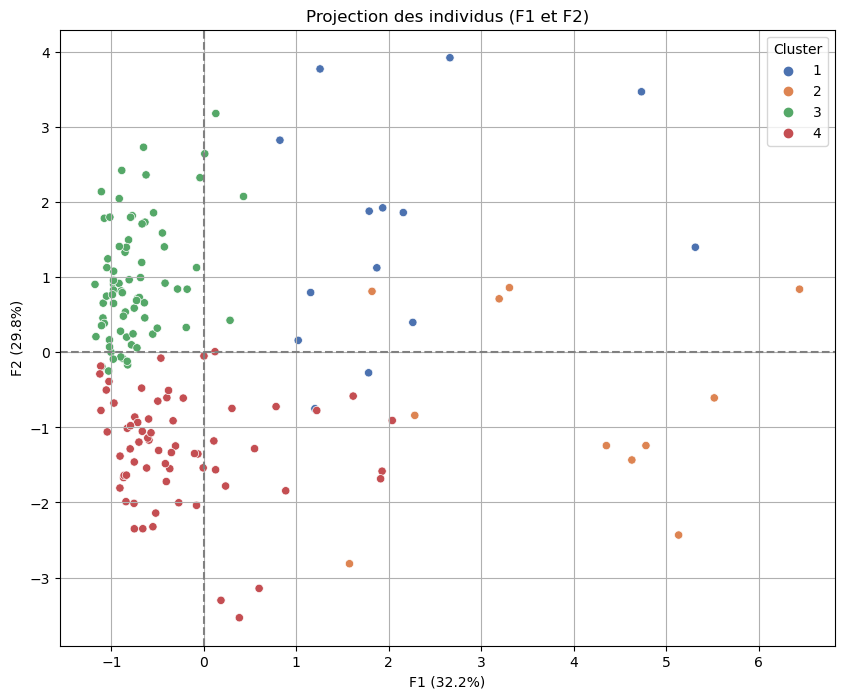

In [45]:
# Afficher les plans factoriels
axes = [(0, 1)]  # Choix des axes à afficher
display_factorial_planes(X_projected, n_components, pca, axes, illustrative_var=clusters, alpha=1)

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Comparaison des clusters </h4>
</div>

In [46]:
# Afficher les moyennes des variables de chaque groupe
Groupe =(1,2,3,4)
for n in Groupe:
    affi=df_final.loc[df_final['Cluster']==n].mean()
    print(affi)

Disponibilité de protéines en quantité (g/personne/jour)    1.144786e+01
Exportations                                                3.600000e+01
Importations                                                1.192857e+02
Production                                                  1.967429e+03
Population                                                  1.189303e+08
PIB par habitant                                            1.353665e+04
Stabilité politique                                        -8.042857e-01
Cluster                                                     1.000000e+00
dtype: float64
Disponibilité de protéines en quantité (g/personne/jour)    1.261727e+01
Exportations                                                5.297273e+02
Importations                                                5.450000e+02
Production                                                  1.778818e+03
Population                                                  6.391274e+07
PIB par habitant                    

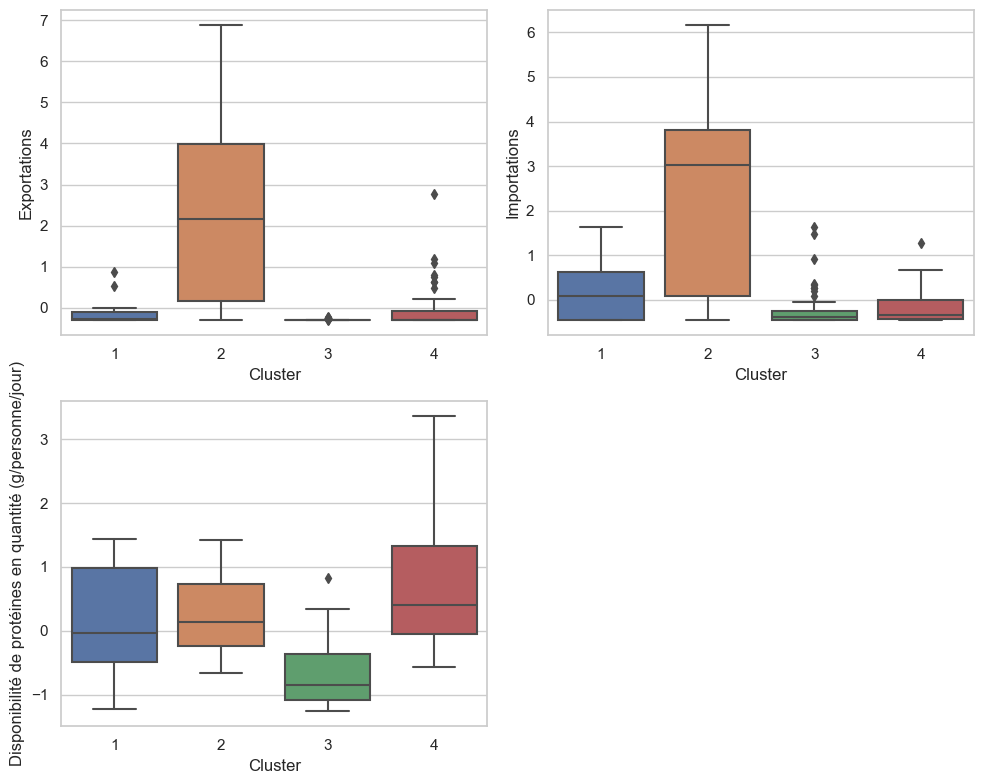

In [47]:
# Affichage des boxplots pour visualiser les variables par cluster
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_norm, x='Cluster', y='Exportations')
plt.subplot(222)
sns.boxplot(data=df_norm, x='Cluster', y='Importations')
plt.subplot(223)
sns.boxplot(data=df_norm, x='Cluster', y='Disponibilité de protéines en quantité (g/personne/jour)')

plt.tight_layout()
plt.show()

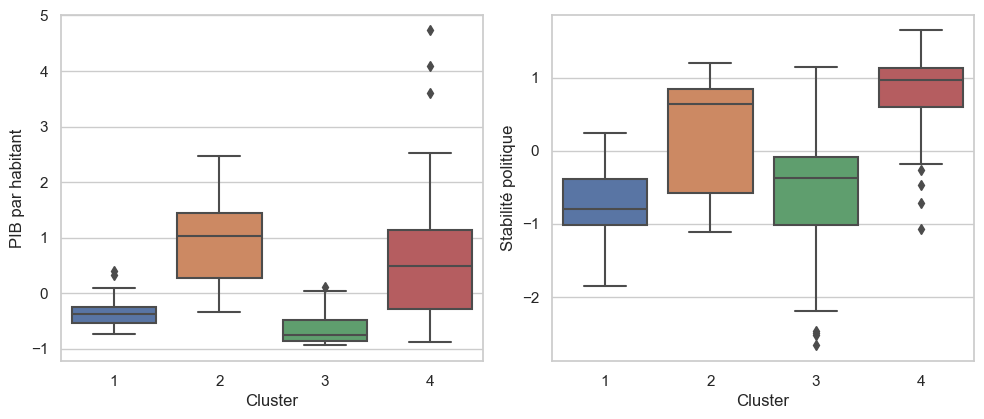

In [48]:
# Affichage des boxplots pour visualiser les variables par cluster
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_norm, x='Cluster', y='PIB par habitant')
plt.subplot(222)
sns.boxplot(data=df_norm, x='Cluster', y='Stabilité politique')


plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h4 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Caractéristique de chaque cluster</h4>
</div>

##### Cluster 1
Ce groupe inclus essentiellement des pays avec :

- Une exportation des plus élevé
- Une dépendance à l'importation des plus élevé
- Une disponibilité de protéines en quantité des plus faible
- Un PIB des plus des faible
- Une stabilité politique plus faible

##### Cluster 2
Ce groupe inclus essentiellement des pays avec :

- Une exportation plus élevée
- Une dépendance à l'importation plus élevée
- Une disponibilité de protéines en quantité des plus élevé
- Un PIB plus élevé
- Une stabilité politique des plus élevé

##### Cluster 3
Ce groupe inclus essentiellement des pays avec :

- Une exportation plus faible
- Une dépendance à l'importation plus faible
- Une disponibilité de protéines en quantité plus faible
- Un PIB plus faible
- Une stabilité politique des plus faible


##### Cluster 4
Ce groupe inclus essentiellement des pays avec :

- Une exportation des plus faible
- Une dépendance à l'importation des plus faible
- Une disponibilité de protéines en quantité plus élevée
- Un PIB des plus élevé
- Une stabilité politique plus élevée

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> III. Conclusion </h2>
</div>

Au vu des caractéristiques de chaque groupe la combinaison la plus favorable à la selection du meilleur cluster pour notre exportation de poulet est le cluster 2. 
Le cluster 2 présente des caractéristiques intéressantes pour notre objectif d'exportation :

- Exportations : 529,73 Millliers de tonnes
- Importations : 545 Milliers de tonnes
- PIB par habitant : 38647 Dollar 
- Stabilité politique : 0,04
- Disponibilité de protéines en quantité (g/personne/jour) : 12,62 

In [49]:
# Affichage du Cluster 2 par la méthode K_Means
cluster_2=df_final.loc[df_final['Cluster']==2]
cluster_2.head(13)

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique,Cluster
Zone,,,,,,,,
Allemagne,8.22,586.0,768.0,1546.0,83408554.0,53179.7,0.76,2
Arabie saoudite,18.74,45.0,626.0,910.0,35950396.0,44339.3,-0.58,2
Japon,11.73,6.0,1136.0,2436.0,124612530.0,40784.4,1.03,2
Mexique,17.43,2.0,1189.0,3687.0,126705138.0,19086.1,-0.64,2
Pays-Bas (Royaume des),5.51,1306.0,763.0,887.0,17501696.0,56617.4,0.92,2
Pologne,14.31,1347.0,69.0,2529.0,38307726.0,34915.5,0.51,2
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,15.78,345.0,747.0,1995.0,67281039.0,44978.7,0.54,2
Thaïlande,5.09,962.0,2.0,1845.0,71601103.0,17077.0,-0.55,2
Turquie,9.04,642.0,41.0,2302.0,84775404.0,31466.6,-1.10,2


In [50]:
# Affichage du Cluster 2 par la classification ascendante hiérarchique 
cluster_2=df_final_clusters.loc[df_final_clusters['cluster']==2]
cluster_2

,Disponibilité de protéines en quantité (g/personne/jour),Exportations,Importations,Production,Population,PIB par habitant,Stabilité politique,cluster
Zone,,,,,,,,
Allemagne,8.22,586.0,768.0,1546.0,83408554.0,53179.7,0.76,2
Arabie saoudite,18.74,45.0,626.0,910.0,35950396.0,44339.3,-0.58,2
Japon,11.73,6.0,1136.0,2436.0,124612530.0,40784.4,1.03,2
Mexique,17.43,2.0,1189.0,3687.0,126705138.0,19086.1,-0.64,2
Pays-Bas (Royaume des),5.51,1306.0,763.0,887.0,17501696.0,56617.4,0.92,2
Pologne,14.31,1347.0,69.0,2529.0,38307726.0,34915.5,0.51,2
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,15.78,345.0,747.0,1995.0,67281039.0,44978.7,0.54,2
Thaïlande,5.09,962.0,2.0,1845.0,71601103.0,17077.0,-0.55,2
Turquie,9.04,642.0,41.0,2302.0,84775404.0,31466.6,-1.10,2


Nous avons le même cluster que soit par la méthode de la classification ascendante hiérarchique ou par la méthode de K_Means.